## Tipos de aprendizaje

* Aprendizaje supervisado
    * Clasificación.
        * Clasificación binaria.
        * Clasificación multiclase.
    * Regresión.

* Aprendizaje no supervisado.
    * Clustering.
    * Reducción de la dimensionalidad.
    * Detección de anomalías.

* Aprendizaje semi-supervisado
* Aprendizaje por refuerzo

### Aprendizaje no supervisado

Aunque la mayoría de las aplicaciones del Machine Learning se basan hoy en día en el aprendizaje supervisado (y, como resultado, es ahí donde se realizan las mayores inversiones), la inmensa mayoría de los datos disponibles no están etiquetados: tenemos las características de entrada ***X***, pero no tenemos las etiquetas ***y***.

#### Clustering

El clustering busca particionar el set de datos en grupos, los cuales son llamados *clusters*. El objetivo consiste en separar los datos de tal forma que los puntos dentro de un clúster sean muy similares y se diferencien con puntos de otros clusters.

##### K-Means

El algoritmo K-Means trata de encontrar los centros de los clusters que sean representativos de ciertas regiones de los datos. El algoritmo alterna tres pasos en su ejecución:

1. Se determina un número de clusters.
2. Busca alrededor de cada centro los puntos más cercanos.
3. Recalcula el centro como el promedio de los puntos dentro de ese cluster.

![SegmentLocal](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif "segment")

In [1]:
import mglearn
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler

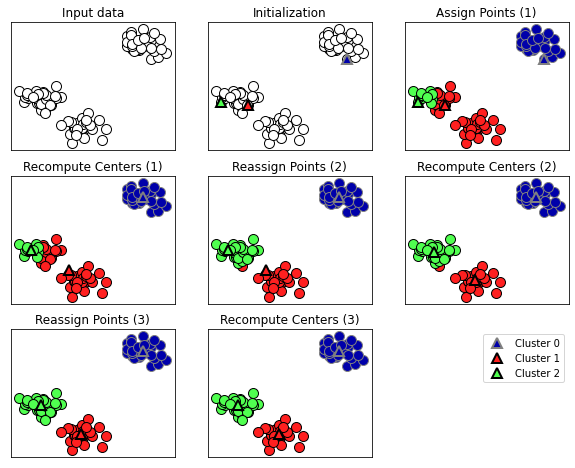

In [2]:
mglearn.plots.plot_kmeans_algorithm()

In [3]:
auto = pd.read_csv('https://raw.githubusercontent.com/stivenlopezg/Diplomado-Python/master/data/mpg.csv')
auto.sample(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
127,19.0,6,232.0,100.0,2901,16.0,74,usa,amc hornet
208,13.0,8,318.0,150.0,3940,13.2,76,usa,plymouth volare premier v8
324,40.8,4,85.0,65.0,2110,19.2,80,japan,datsun 210
155,15.0,6,250.0,72.0,3158,19.5,75,usa,ford maverick


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Preprocesamiento

* Eliminar las variables que no voy a usar
* Tratar los datos missing
* Escalar los datos numericos

In [5]:
cols_to_drop = ["model_year", "origin", "name"]

auto = auto.drop(labels=cols_to_drop, axis=1)

In [6]:
imputer = SimpleImputer(strategy='median').fit(auto)

In [7]:
for col, median in zip(auto.columns, imputer.statistics_):
    print(f"La mediana de la variable {col} es: {median}")

La mediana de la variable mpg es: 23.0
La mediana de la variable cylinders es: 4.0
La mediana de la variable displacement es: 148.5
La mediana de la variable horsepower es: 93.5
La mediana de la variable weight es: 2803.5
La mediana de la variable acceleration es: 15.5


In [8]:
auto = pd.DataFrame(imputer.transform(auto), columns=auto.columns)

In [10]:
scaler = RobustScaler().fit(auto)

auto = pd.DataFrame(scaler.transform(auto), columns=auto.columns)

In [11]:
auto.sample(n=4)

,mpg,cylinders,displacement,horsepower,weight,acceleration
199,-0.260870,0.5,0.484945,0.132653,0.612245,0.656716
125,-0.260870,0.5,0.313788,0.030612,0.215640,0.298507
216,0.739130,0.0,-0.320127,-0.520408,-0.547950,0.895522
214,-0.869565,1.0,0.973059,0.744898,0.770453,-0.149254


## K-Means

**Nota**: Es un algoritmo que funciona solo con variables numéricas

In [12]:
kmeans = KMeans(n_clusters=6, random_state=42)

kmeans.fit(auto)

KMeans(n_clusters=6, random_state=42)

In [13]:
kmeans.predict(auto)

array([1, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 0, 0, 2, 5, 2, 2,
       2, 2, 2, 4, 4, 4, 1, 2, 2, 2, 5, 2, 0, 0, 0, 0, 4, 4, 1, 1, 4, 4,
       4, 0, 5, 0, 0, 2, 2, 5, 3, 5, 3, 5, 5, 2, 2, 5, 5, 2, 4, 4, 1, 1,
       1, 4, 1, 1, 4, 2, 1, 1, 1, 1, 2, 5, 5, 5, 2, 2, 2, 2, 2, 4, 1, 1,
       1, 1, 4, 4, 1, 1, 4, 4, 4, 0, 0, 0, 0, 0, 5, 1, 4, 4, 4, 0, 5, 5,
       2, 2, 5, 2, 2, 1, 4, 5, 2, 2, 2, 1, 2, 2, 4, 0, 0, 0, 0, 5, 2, 5,
       2, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 2, 3, 5, 2, 2, 2, 2, 2, 3, 0, 0,
       0, 0, 4, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 2, 0, 5, 2, 2, 2, 0, 3,
       0, 2, 2, 2, 2, 3, 2, 2, 2, 5, 2, 1, 1, 1, 1, 0, 0, 0, 0, 5, 5, 3,
       3, 0, 0, 0, 0, 2, 3, 3, 2, 2, 1, 5, 0, 0, 4, 1, 1, 1, 5, 3, 5, 2,
       3, 1, 0, 1, 1, 0, 0, 0, 0, 4, 4, 4, 1, 3, 2, 5, 2, 3, 3, 3, 3, 2,
       2, 2, 5, 3, 5, 3, 3, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 0, 3, 3, 0, 0, 2, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 5, 0, 5, 0,

In [16]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],
      dtype='object')

In [15]:
# Centroides

np.round(kmeans.cluster_centers_, 3)

array([[-0.332,  0.533,  0.519,  0.135,  0.357,  0.406],
       [-0.666,  0.992,  1.085,  1.046,  0.869, -0.593],
       [ 0.175,  0.049, -0.135, -0.002, -0.199, -0.174],
       [ 0.953,  0.007, -0.314, -0.449, -0.519,  0.112],
       [-0.827,  1.   ,  1.525,  1.905,  1.1  , -1.247],
       [ 0.516,  0.019, -0.253, -0.475, -0.302,  1.316]])

In [17]:
kmeans.inertia_

189.14123641055835

## K Optimo

In [19]:
n_clusters = np.linspace(start=2, stop=20, num=10, dtype=int).tolist()
n_clusters

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [20]:
inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42).fit(auto)
    inertia.append(kmeans.inertia_)

inertia

[465.0108336941032,
 255.26810245320974,
 189.14123641055835,
 156.9946274376306,
 133.99723085656828,
 119.60573553278728,
 106.15522376154559,
 98.00938722564709,
 89.94513037911076,
 83.57506258262795]

In [21]:
for n, iner in zip(n_clusters, inertia):
    print(f"Para k: {n}, la inertia es: {iner}")

Para k: 2, la inertia es: 465.0108336941032
Para k: 4, la inertia es: 255.26810245320974
Para k: 6, la inertia es: 189.14123641055835
Para k: 8, la inertia es: 156.9946274376306
Para k: 10, la inertia es: 133.99723085656828
Para k: 12, la inertia es: 119.60573553278728
Para k: 14, la inertia es: 106.15522376154559
Para k: 16, la inertia es: 98.00938722564709
Para k: 18, la inertia es: 89.94513037911076
Para k: 20, la inertia es: 83.57506258262795


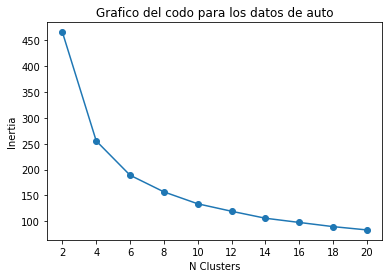

In [22]:
plt.plot(n_clusters, inertia, marker='o')
plt.xticks(n_clusters)
plt.xlabel("N Clusters")
plt.ylabel("Inertia")
plt.title("Grafico del codo para los datos de auto")
plt.show()

In [26]:
silhouette = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42).fit(auto)
    silhouette.append(silhouette_score(X=auto, labels=kmeans.labels_))

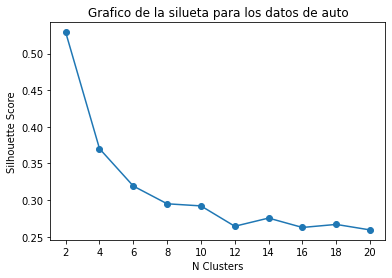

In [27]:
plt.plot(n_clusters, silhouette, marker='o')
plt.xticks(n_clusters)
plt.xlabel("N Clusters")
plt.ylabel("Silhouette Score")
plt.title("Grafico de la silueta para los datos de auto")
plt.show()

In [28]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(auto)

prediction = pd.Series(kmeans.predict(auto)).apply(lambda x: int(x + 1))

auto["cluster"] = prediction

In [29]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,cluster
0,-0.434783,1.0,1.004754,0.744898,0.506050,-1.044776,2
1,-0.695652,1.0,1.277338,1.459184,0.642586,-1.194030,2
2,-0.434783,1.0,1.074485,1.153061,0.456926,-1.343284,2
3,-0.608696,1.0,0.985737,1.153061,0.454759,-1.044776,2
4,-0.521739,1.0,0.973059,0.948980,0.466318,-1.492537,2
...,...,...,...,...,...,...,...
393,0.347826,0.0,-0.053883,-0.153061,-0.009753,0.029851,4
394,1.826087,0.0,-0.326466,-0.846939,-0.486545,2.716418,5
395,0.782609,0.0,-0.085578,-0.193878,-0.367347,-1.164179,1
396,0.434783,0.0,-0.180666,-0.295918,-0.128951,0.925373,6


In [30]:
columns = auto.drop(labels="cluster", axis=1).columns.tolist()

auto.loc[:, columns] = scaler.inverse_transform(auto.drop(labels="cluster", axis=1))

auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,cluster
0,18.0,8.0,307.0,130.0,3504.0,12.0,2
1,15.0,8.0,350.0,165.0,3693.0,11.5,2
2,18.0,8.0,318.0,150.0,3436.0,11.0,2
3,16.0,8.0,304.0,150.0,3433.0,12.0,2
4,17.0,8.0,302.0,140.0,3449.0,10.5,2
...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,4
394,44.0,4.0,97.0,52.0,2130.0,24.6,5
395,32.0,4.0,135.0,84.0,2295.0,11.6,1
396,28.0,4.0,120.0,79.0,2625.0,18.6,6


In [35]:
np.round(auto.groupby(by="cluster").mean(), 2).style.background_gradient(cmap="Blues")

,mpg,cylinders,displacement,horsepower,weight,acceleration
cluster,,,,,,
1,33.180000,4.030000,101.970000,73.300000,2117.180000,15.240000
2,14.970000,7.970000,324.820000,148.240000,4050.880000,13.400000
3,18.970000,6.290000,244.710000,96.820000,3498.610000,18.660000
4,24.800000,4.150000,125.590000,93.920000,2535.880000,14.990000
5,35.760000,4.030000,89.470000,63.930000,2054.150000,18.970000
6,25.170000,4.080000,121.170000,76.310000,2567.780000,19.740000
7,19.350000,6.120000,221.940000,102.780000,3159.980000,15.620000
8,13.600000,8.000000,397.420000,190.680000,4342.160000,11.030000


In [33]:
np.round(auto.groupby(by="cluster").std(), 2)

,mpg,cylinders,displacement,horsepower,weight,acceleration
cluster,,,,,,
1,3.52,0.25,24.29,9.01,227.66,1.20
2,2.25,0.25,27.09,13.48,392.65,1.38
3,2.98,0.71,34.72,12.37,295.57,1.30
4,2.91,0.64,23.18,11.87,257.57,1.40
5,4.77,0.17,13.33,10.32,265.52,1.76
6,3.26,0.37,23.86,13.22,451.48,1.70
7,1.97,0.47,29.65,11.35,283.85,1.00
8,1.73,0.00,37.29,22.30,476.05,1.45
